## Random Forest Classifier

#### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Loading Dataset

In [2]:
df = pd.read_csv('social_networks_ad.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


#### Dependent and Independent

In [3]:
x=df.iloc[:,[2,3]].values
y=df.iloc[:,4].values

#### Splitting Dataset

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

#### Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

#### Training Model

In [6]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

#### Performance of the Model

In [7]:
from sklearn.metrics import confusion_matrix
con=confusion_matrix(y_test,y_pred)
con

array([[64,  4],
       [ 3, 29]], dtype=int64)

In [8]:
from sklearn.metrics import accuracy_score
print('Accuracy:',accuracy_score(y_test,y_pred)*100)

Accuracy: 93.0


#### Visualization of the Performance Of Model

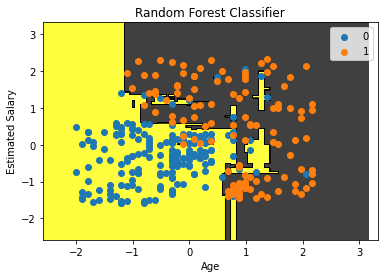

In [19]:
from matplotlib.colors import ListedColormap
x_set,y_set = x_train,y_train
x1,x2 = np.meshgrid(np.arange(start=x_set[:,0].min() -1,stop=x_set[:,0].max() +1,step=0.01),
                    np.arange(start=x_set[:,1].min() -1,stop=x_set[:,1].max() +1,step=0.01))

plt.contourf(x1,x2,rf.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75,cmap=ListedColormap(('yellow','black')))

plt.xlim(x1.min(),x1.max())
plt.xlim(x2.min(),x2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
                cmap=ListedColormap(('blue','orange'))(i),label=j)
    
plt.title('Random Forest Classifier')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()